### Load necessary modules and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import TransCompR as tcr
from sklearn.metrics import accuracy_score, precision_score, recall_score, make_scorer, davies_bouldin_score, calinski_harabasz_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [2]:
human_metadata = pd.read_csv('C:\\Users\\Ran\\Documents\\microarrays\\GSE33341\\GSE33341_human_metadata.csv', index_col='Sample_geo_accession')
human_expression = pd.read_csv('C:\\Users\\Ran\\Documents\\microarrays\\GSE33341\\human_expression_geneID.csv', index_col='ID_REF')
mouse_metadata = pd.read_csv('C:\\Users\\Ran\\Documents\\microarrays\\GSE33341\\GSE33341_mouse_metadata.csv', index_col='Sample_geo_accession')
mouse_expression = pd.read_csv('C:\\Users\\Ran\\Documents\\microarrays\\GSE33341\\mouse_expression_geneID.csv', index_col='ID_REF')
human_classes = human_metadata['pathogen']!='-'

Note that the columns of the ogranism 1 and 2's data has been matched already in this example. Now let's give it a preview:

In [3]:
human_expression.head(10)

,DDR1,RFC2,PAX8,GUCA1A,UBA7,THRA,PTPN21,CCL5,CYP2E1,EPHB3,...,ALS2CL,SMIM14,EMC10,LAMA1,FBXO31,SLC44A1,KCNE4,TMEM231,SNHG17,NPEPL1
ID_REF,,,,,,,,,,,,,,,,,,,,,
GSM824707,7.00889,7.24200,8.33034,4.03420,8.39803,5.96307,4.69108,10.61470,3.93123,5.72421,...,7.36255,4.30174,5.11359,4.66935,6.14547,4.76208,4.02242,4.10080,6.61629,7.58422
GSM824708,7.09632,6.87557,7.99800,3.83309,9.40449,5.72081,4.26818,10.52270,3.88945,5.75642,...,6.79736,5.02472,5.16065,4.58411,6.15040,4.83636,4.17451,4.21577,7.18347,7.41464
GSM824709,6.94109,6.86724,7.89547,3.53612,9.24506,5.49332,4.31802,11.26410,3.93450,5.30894,...,6.62297,4.70408,4.89644,4.77543,6.25433,4.96199,3.99491,4.09268,8.06889,7.31179
GSM824710,6.90002,7.11689,7.85057,3.76981,9.26308,5.57711,4.35805,11.50350,4.01784,5.44269,...,6.73836,5.09136,5.07144,4.73067,5.89206,5.22872,3.94885,4.23540,7.67487,7.26331
GSM824711,7.45450,7.65023,8.27229,3.86178,9.80692,5.90567,4.60175,11.27680,3.77905,6.07312,...,7.33798,4.31237,6.08119,4.50602,6.42534,5.58384,4.04788,4.11791,8.00925,7.75276
GSM824712,6.69461,7.29010,8.09235,3.51172,8.23593,5.68906,4.45657,9.83553,4.13670,5.56029,...,6.76512,4.25240,4.99386,4.71473,6.05080,4.69516,4.19092,4.34889,7.62965,7.37518
GSM824713,6.87552,6.89077,7.82074,3.48766,9.51382,5.31584,4.12190,11.36380,4.01738,5.57850,...,7.18054,4.00362,5.67785,4.58578,6.35228,4.55718,4.04887,4.10583,7.08354,7.36076
GSM824714,6.87659,7.26177,7.92639,3.65178,8.94733,5.29128,4.40682,9.82324,3.94275,5.65832,...,6.93221,4.01623,5.11251,5.02290,5.89656,4.52838,4.12902,4.10702,7.95580,7.48174
GSM824715,7.16348,7.30111,8.45341,3.75418,8.43574,5.52944,4.56456,11.32970,3.92538,5.70801,...,7.26387,4.27305,5.18532,4.82684,6.26611,4.92633,4.07648,4.38087,7.76745,7.73944


In [4]:
mouse_expression.head(10)

,Ddr1,Rfc2,Pax8,Guca1a,Uba7,Thra,Ptpn21,Ccl5,Cyp2e1,Ephb3,...,Als2cl,Smim14,Emc10,Lama1,Fbxo31,Slc44a1,Kcne4,Tmem231,Snhg17,Npepl1
ID_REF,,,,,,,,,,,,,,,,,,,,,
GSM824455,6.59075,7.16547,4.64884,5.24159,9.67901,6.45267,6.51602,10.27910,13.30180,6.14806,...,6.42583,9.97392,8.76198,3.72310,6.85752,9.04414,5.96308,5.69251,5.83802,8.29632
GSM824456,6.28290,7.64314,4.11605,5.18289,10.03550,6.73455,6.13205,10.16850,5.05888,6.17968,...,6.51857,10.25670,9.04596,3.48279,6.93879,9.53237,5.90119,5.58291,6.15930,8.17503
GSM824457,6.61388,7.56823,3.94917,4.81408,9.96304,6.65090,6.10990,10.96150,10.99300,5.97237,...,6.53526,10.17460,9.22475,3.71384,6.99318,9.20157,5.81836,5.65909,6.22437,8.35139
GSM824458,6.31724,7.08073,3.98135,5.14003,8.55048,6.36744,6.72110,10.15500,13.66380,5.79291,...,5.79879,9.44714,8.83273,3.71983,8.56007,8.61856,5.72251,5.52079,5.74857,8.33560
GSM824459,6.37421,7.31968,4.42089,4.95410,9.26919,6.55388,6.37879,10.25590,13.04120,5.91085,...,6.05432,9.86302,8.57774,3.65745,8.51932,9.39061,6.00684,5.80044,5.84194,7.91521
GSM824460,6.37428,7.49725,4.17620,5.38814,9.22984,6.65039,6.29226,10.51860,12.98680,5.92439,...,6.01197,9.83926,8.83082,3.61815,8.16563,8.73853,5.99903,5.98325,5.95270,8.56109
GSM824461,6.56696,7.24045,4.63141,5.23219,10.03310,6.29659,6.36184,10.82330,11.35410,6.17993,...,5.84615,10.24530,8.50277,3.66471,6.54469,10.07810,6.05632,5.95467,5.96663,8.35363
GSM824462,6.57117,7.30288,4.27666,5.29497,9.77620,6.21170,6.16470,9.97579,10.80650,6.52038,...,5.87113,10.39910,8.50116,3.87288,6.58916,9.91247,6.23784,6.30368,6.06283,8.13063
GSM824463,6.41298,7.46406,4.45465,5.25425,9.87129,6.30651,6.06194,10.85680,6.82483,6.49700,...,5.93887,10.25460,8.26271,3.75790,6.15841,9.86177,6.33235,6.24784,6.09837,8.24744


The TransCompR essentially takes 3 inputs: The profile of organism 1, the profile of organism 2, and the binary classes of organism 2 that has the biological significance we are interested in. What TransCompR does is to use **organism 1's pattern** to interpret **organism 2's classes**.

In this tutorial, since we are interested in how the mouse feature pattern is indicative of human infection status, let's be clear about the variable assignment here: **organism 1 is mouse and organism 2 is human**.

### Applying the TransCompR Method

The main function in this package is `TransCompR`, which performs the cross-species transcriptomic comparison. In the simplest scenario, it works like:
`results = tcr.TransCompR(organism1_data, organism2_data, organism2_classes)`, which will run PCA on your organism 1's data, keep the top 50 PC by default, project organism 2's data into the feature space derived from organism 1, and perform a logistic regression with l1 penalty and C = 1.0 on the organism 2 classes over the projected organism 2's data.

Given that our organism 1 is mouse and organism 2 is human, the code to run TransCompR should be:

`results = tcr.TransCompR(mouse_expression, human_expression, human_classes)`

...And this is what we discussed in the basic tutorial. But we know that in any biological studies, covariates have significant contribution to the data, so it is relatively biased to not consider the effect of covariates. Let's say we want to see how ethnicity, host gender, host age, pathogen type, anatomic site, ad experimental batch contributes to the regression result:

In [5]:
human_metadata.head(5)

,Sample_title,Sample_source_name_ch1,Sample_organism_ch1,ethnicity,host gender,host age (yr),pathogen,anatomic site of infection,experimental batch
Sample_geo_accession,,,,,,,,,
GSM824707,blood patient with E. coli bacteremia [CS101-D...,blood patient with E. coli bacteremia prior an...,Homo sapiens,Black,Female,43,Escherichia coli,Urinary tract,2034
GSM824708,blood patient with E. coli bacteremia [D887.2....,blood patient with E. coli bacteremia prior an...,Homo sapiens,White,Female,49,Escherichia coli,Urinary tract,2034
GSM824709,blood patient with E. coli bacteremia [CSD5036...,blood patient with E. coli bacteremia prior an...,Homo sapiens,Black,Female,44,Escherichia coli,Urinary tract,2034
GSM824710,blood patient with E. coli bacteremia [CSD2575...,blood patient with E. coli bacteremia prior an...,Homo sapiens,White,Female,70,Escherichia coli,Urinary tract,2034
GSM824711,blood patient with E. coli bacteremia [D2341.CEL],blood patient with E. coli bacteremia prior an...,Homo sapiens,Black,Male,40,Escherichia coli,Urinary tract,2287


In [22]:
human_covar = human_metadata[['ethnicity','host gender','host age (yr)','anatomic site of infection','experimental batch']]
human_covar

,ethnicity,host gender,host age (yr),anatomic site of infection,experimental batch
Sample_geo_accession,,,,,
GSM824707,Black,Female,43,Urinary tract,2034
GSM824708,White,Female,49,Urinary tract,2034
GSM824709,Black,Female,44,Urinary tract,2034
GSM824710,White,Female,70,Urinary tract,2034
GSM824711,Black,Male,40,Urinary tract,2287
...,...,...,...,...,...
GSM932380,White,Male,65,Urinary Tract,2739
GSM932381,White,Female,63,Urinary Tract,2739
GSM932382,White,Female,81,Urinary Tract,2739


Now let's pass the covariates into the TransCompR. TransCompR will use one hot encoding to create dummies for the categorical covariates. By default, it treats all covariates as **categorical**. If some of them are not categorical--for example, in this dataset `'host age (yr)'` is not categorical--you need to specify the exact non-categorical covariates names in a list and pass it to the argument `non_cat_covar`:

In [24]:
results_with_covar = tcr.TransCompR(mouse_expression, 
                                    human_expression, human_classes, organism2_covar = human_covar,
                                    non_cat_covar = ['host age (yr)'],random_state = 42)

Let's take a look at PC's coefficients when covariates are also in the regression. Since we are using l1 penalty, we should expect most of the coefs be 0: 

In [25]:
results_with_covar['predictivity_summary']['coefs'][results_with_covar['predictivity_summary']['coefs']!=0]

2    -2.134877
6     1.790534
7    -0.586899
10   -0.349900
42   -0.087771
44   -0.174994
47    0.440331
Name: coefs, dtype: float64

If you are also interested in the coefs of covariates:

In [26]:
results_with_covar['all_regression_coeffs'][results_with_covar['all_regression_coeffs'].values!=0]

,coefs
2,-2.134877
6,1.790534
7,-0.586899
10,-0.349900
42,-0.087771
44,-0.174994
47,0.440331
dummy_ethnicity_Black,0.375037
host age (yr),0.123132


From the logistic regression, we got that host age correlates with the odds of infection. Let's see how the model without covariates look like:

In [27]:
results_without_covar = tcr.TransCompR(mouse_expression, human_expression, human_classes)

In [28]:
results_without_covar['predictivity_summary']['coefs'][results_without_covar['predictivity_summary']['coefs']!=0]

1     0.124795
2    -1.644416
6     2.103025
7    -0.742368
19    0.279746
26   -0.057291
43   -0.461349
46   -0.089382
47   -0.227171
49    0.159663
Name: coefs, dtype: float64

If we compare the accuracy of these two model, at least in this example specifically they don't differ in terms of the accuracy on the testing dataset. It could attribute to the fact that we don't have many patient samples:

In [29]:
results_with_covar['cross_validation_metrics']

,test accuracy,test precision,test recall
0,1.0,1.0,1.0


In [30]:
results_without_covar['cross_validation_metrics']

,test accuracy,test precision,test recall
0,1.0,1.0,1.0


### Find out how well the separate the organism2 classes on covariates

It seems like with the addition of covariates into the regression model, PC1 (index 0) joined the model, although the magnitude of the coefficient is very marginal. Let's take a look at how two human classes are separated on the PC 1:

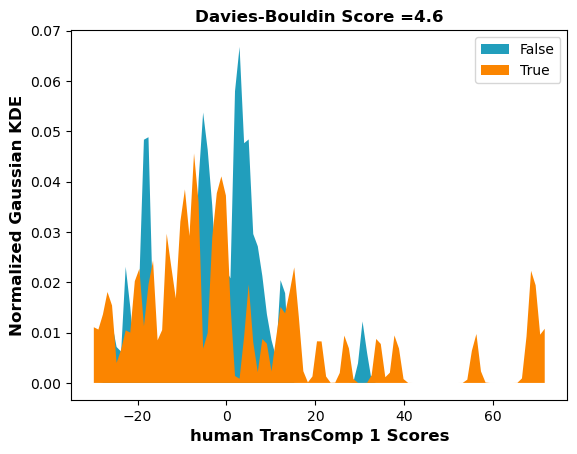

In [31]:
tcr.plot.partition(results_with_covar,organism2_name='human', metric='db', pcs=0)

The function `plot.partition` can also plot the the KDE of organism2 classes on **the dummy of categorical covariates** or **nummeric covariates**. To do that, you have to use the exact name of the covariates/dummies used by TransCompR in the regression. In short, you need to use the rownames of the dataframe `results['all_regression_coeffs']`--this makes sense, like once you are done with the basic TransCompR function, if you want to go with the `'coefs'` metric, you would first want to check what regression terms have non-zero coefs, and you use the exact term names to visualize the classes separation.  

Assume you keep you `n_pcs` argument in the main function to its default aka 50, then you should expect to see your covar terms starting from 51th position:

In [32]:
results_with_covar['all_regression_coeffs'].index.tolist()[50:]

['dummy_ethnicity_Asian',
 'dummy_ethnicity_Black',
 'dummy_ethnicity_Unknown',
 'dummy_ethnicity_White',
 'dummy_host gender_Female',
 'dummy_host gender_Male',
 'dummy_anatomic site of infection_-',
 'dummy_anatomic site of infection_Bone',
 'dummy_anatomic site of infection_CNS',
 'dummy_anatomic site of infection_Cardiac',
 'dummy_anatomic site of infection_Cardiac-Endocarditis',
 'dummy_anatomic site of infection_Lung',
 'dummy_anatomic site of infection_Skin',
 'dummy_anatomic site of infection_Skin or Skin Structure',
 'dummy_anatomic site of infection_Unknown',
 'dummy_anatomic site of infection_Urinary Tract',
 'dummy_anatomic site of infection_Urinary tract',
 'dummy_anatomic site of infection_Vascular catheter',
 'dummy_anatomic site of infection_cardiac',
 'dummy_anatomic site of infection_lung',
 'dummy_anatomic site of infection_urinary tract',
 'dummy_anatomic site of infection_vascular catheter',
 'dummy_experimental batch_2034',
 'dummy_experimental batch_2287',
 'dumm

Because the `'host age (yr)'` stands out in the regression (i.e., has a non-zero coefficient), we'd like to check how 2 human classes are separated among different ages. `plot.partition` can visualize this. 

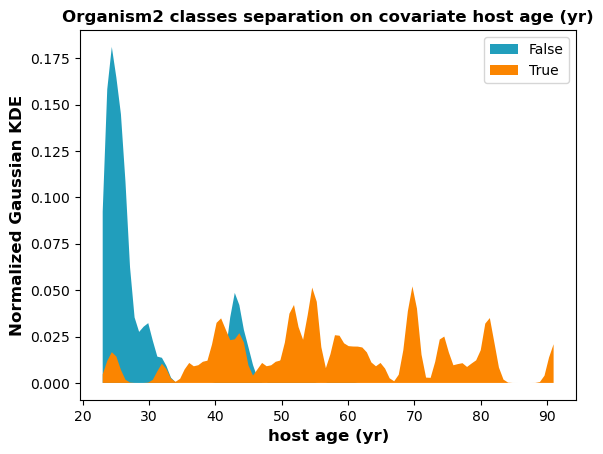

In [33]:
tcr.plot.partition(results_with_covar,organism2_name='human', covar='host age (yr)')

From the visualization, we can tell that (although "perfect data" is never a thing in clinical studies) the data is collected with bias in subjects age -- uninfected subjects are younger than infected subjects, so any pattern we see that are different between infected and uninfected subjects may partially attribute to the altered cellular mechanism caused by senescence.

Nonetheless, since TransCompR focuses on examining the pattern of features, not the covariates, it doesn't have a specific internal function to quantify the clustering (i.e., calculate the db/ch/mean difference/etc.) of 2 classes on a numeric covariate. You can manually calculate it by doing these calculations on `results['X'][covar_names].values` with the class label `results['y']`.

If a dummy stands out in the regression (or you simply just want to check a dummy up), TransCompR can also visualize the partition using a heatmap. Since `dummy_ethnicity_Black` stands out in the regression, let's take a look:

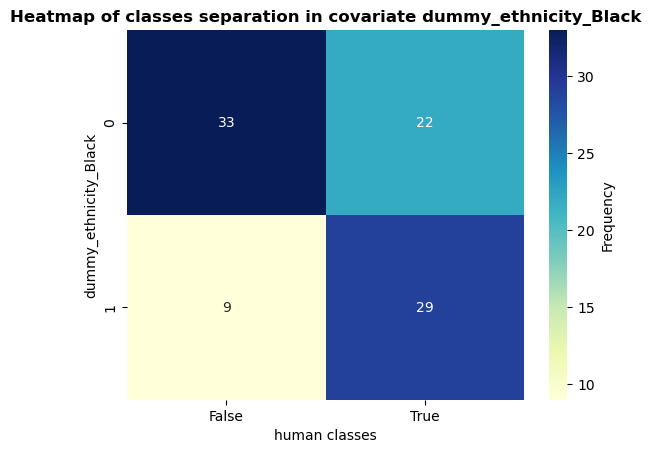

In [34]:
tcr.plot.partition(results_with_covar,organism2_name='human', covar='dummy_ethnicity_Black')

A perfectly unbiased covariate should have equal amount `True` and `False` classes for each dummy code. We can see that when `dummy_ethnicity_Black` encodes `1`, more subjects are infected (True), which explains why this dummy is included in the regression.

Check multiple covars at the same time:

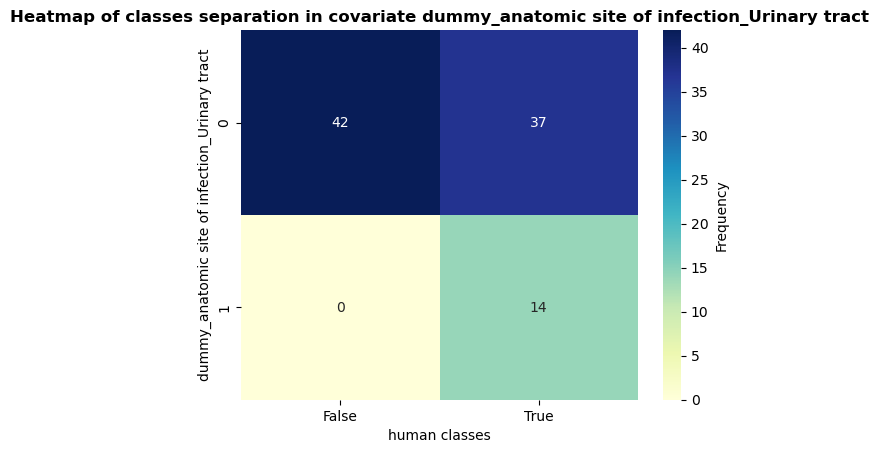

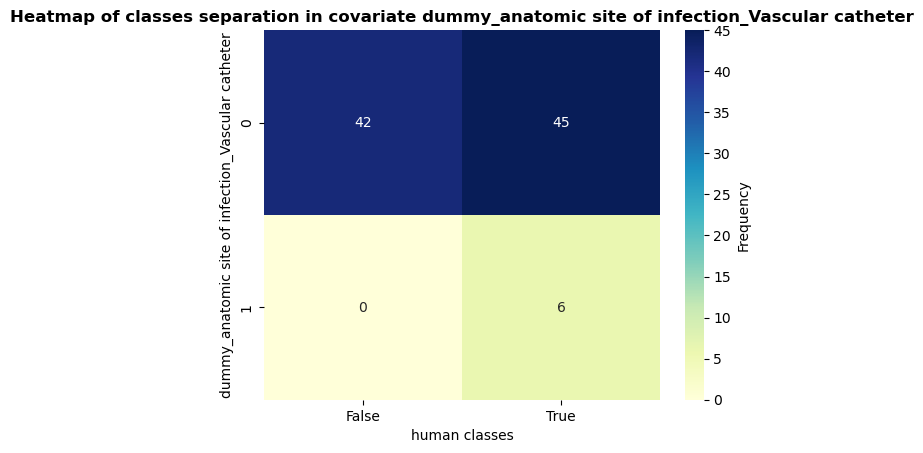

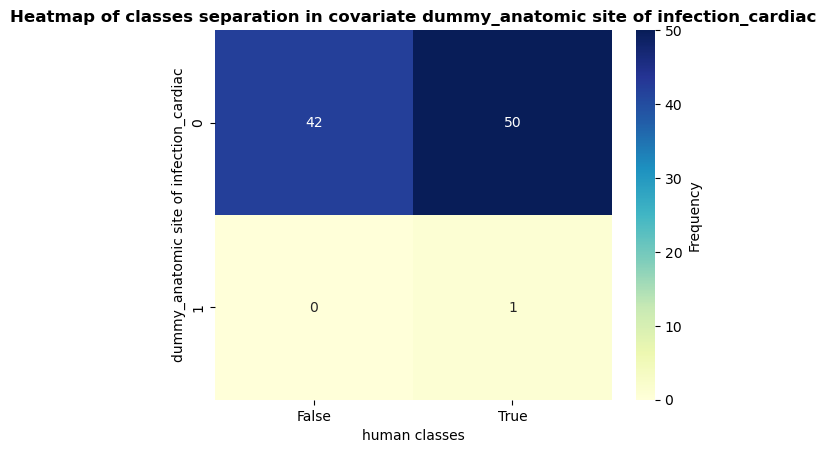

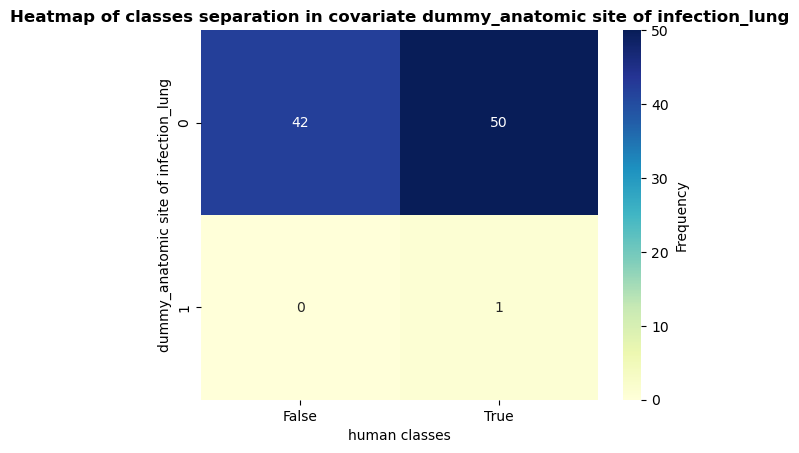

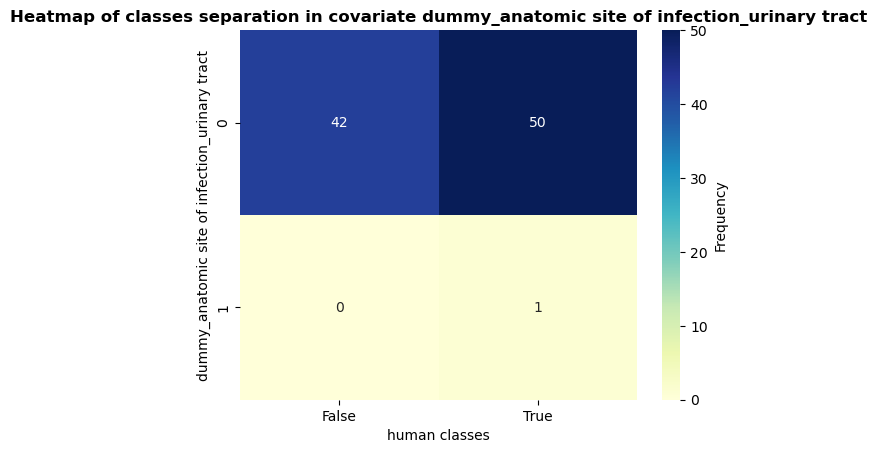

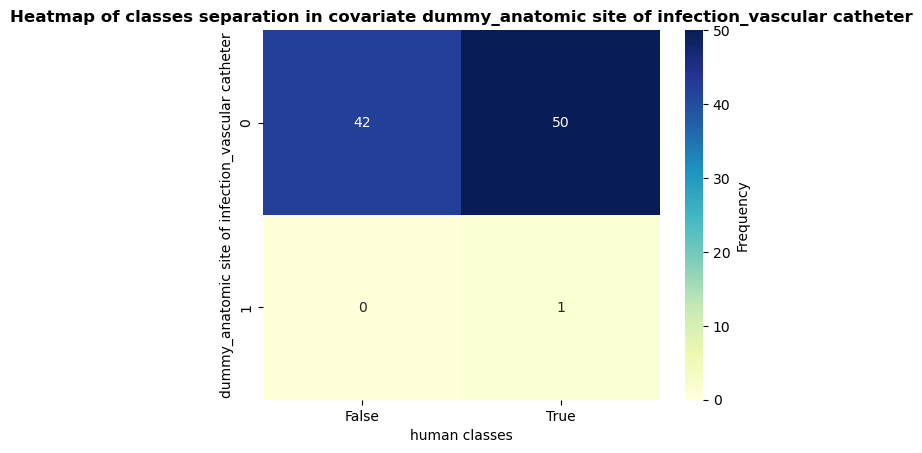

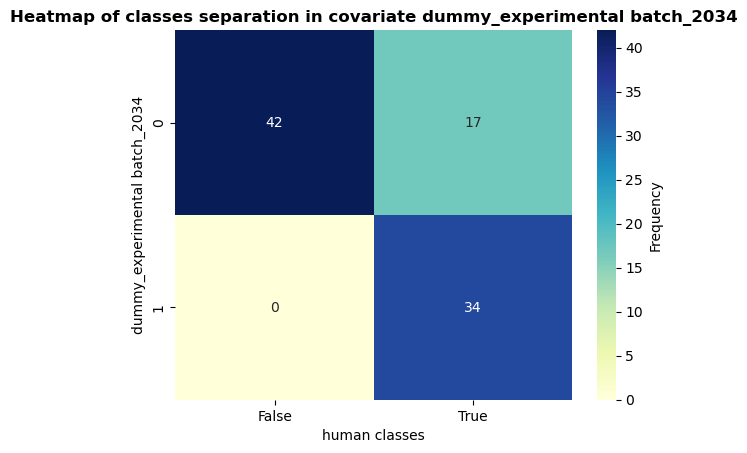

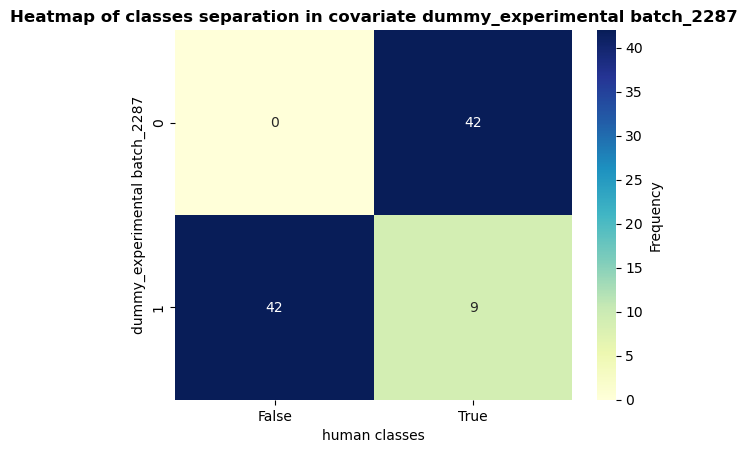

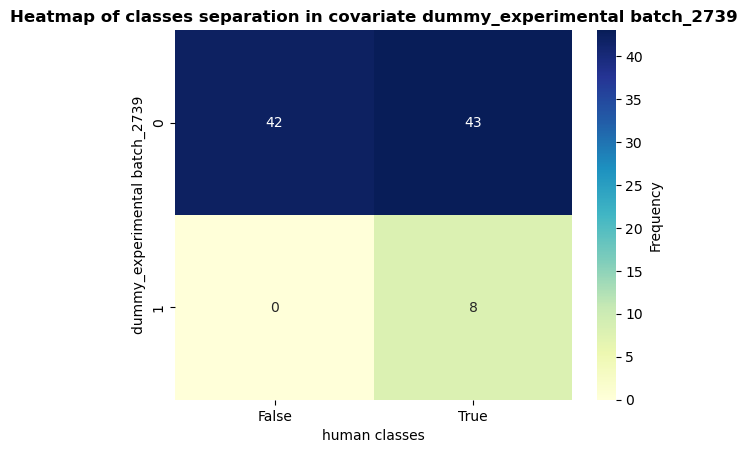

In [21]:
tcr.plot.partition(results_with_covar,organism2_name='human', covar=results_with_covar['all_regression_coeffs'].index.tolist()[70:79])